In [1]:
import pandas as pd


In [2]:
import requests
import time
import os

# Output folder
output_dir = "usgs_zone_data"
os.makedirs(output_dir, exist_ok=True)

# zones and their bounding boxes (latitude/longitude)
zones = {
    "Z1_Himalaya":       {"min_lat": 28, "max_lat": 36, "min_lon": 76, "max_lon": 82},
    "Z2_NorthEast":      {"min_lat": 22, "max_lat": 30, "min_lon": 89, "max_lon": 98},
    "Z3_AndamanNicobar": {"min_lat": 6,  "max_lat": 15, "min_lon": 91, "max_lon": 94},
    "Z4_KutchGujarat":   {"min_lat": 22, "max_lat": 25, "min_lon": 68, "max_lon": 72},
    "Z5_Peninsular":     {"min_lat": 10, "max_lat": 20, "min_lon": 74, "max_lon": 85},
}

# Common query settings
base_url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params_template = {
    "format": "csv",
    "starttime": "1970-01-01",
    "endtime": "2024-12-31",
    "minmagnitude": 2.0,
    "orderby": "time-asc"
}

for zone_name, coords in zones.items():
    print(f"Downloading data for {zone_name}...")

    params = params_template.copy()
    params.update({
        "minlatitude": coords["min_lat"],
        "maxlatitude": coords["max_lat"],
        "minlongitude": coords["min_lon"],
        "maxlongitude": coords["max_lon"]
    })

    response = requests.get(base_url, params=params)

    if response.status_code == 200 and "time" in response.text:
        filename = os.path.join(output_dir, f"{zone_name}.csv")
        with open(filename, "w", encoding="utf-8") as f:
            f.write(response.text)
        print(f"✓ Saved: {filename}")
    else:
        print(f"✗ Failed to download data for {zone_name} (status: {response.status_code})")

    time.sleep(1)

print("\n All zone data downloaded.")


✓ Saved: usgs_zone_data\Z1_Himalaya.csv
✓ Saved: usgs_zone_data\Z2_NorthEast.csv
✓ Saved: usgs_zone_data\Z3_AndamanNicobar.csv
✓ Saved: usgs_zone_data\Z4_KutchGujarat.csv
✓ Saved: usgs_zone_data\Z5_Peninsular.csv

 All zone data downloaded.


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_zonewise_frequency(datasets, zone_labels, bin_width=0.2):
    """
    Plots magnitude frequency histograms for multiple zones.

    Parameters:
    - datasets (list of DataFrames): List of zone-wise dataframes
    - zone_labels (list of str): Corresponding zone labels (e.g., ["Z1", "Z2", ...])
    - bin_width (float): Bin width for histograms (default: 0.2)
    """
    num_zones = len(datasets)
    all_mags = pd.concat([df['mag'] for df in datasets])
    min_mag, max_mag = all_mags.min(), all_mags.max()
    bins = np.arange(min_mag, max_mag + bin_width, bin_width)

    fig, axes = plt.subplots(num_zones, 1, figsize=(8, 4 * num_zones), sharex=True)

    # Ensure axes is iterable even for one subplot
    if num_zones == 1:
        axes = [axes]

    for i, (df, label) in enumerate(zip(datasets, zone_labels)):
        axes[i].hist(df['mag'], bins=bins, edgecolor='black', color='skyblue')
        axes[i].set_title(f'{label} - Earthquake Magnitude Frequency')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)

    axes[-1].set_xlabel('Magnitude')
    plt.tight_layout()
    plt.show()


In [64]:
real_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1970-02-12T01:51:48.800Z,29.2760,81.6480,15.200,5.40,mw,NaN,NaN,NaN,NaN,...,2022-04-26T21:48:38.680Z,"48 km N of Dailekh, Nepal",earthquake,NaN,3.600,0.420,NaN,reviewed,iscgem,iscgem
1,1970-03-05T18:34:21.100Z,32.3760,76.6080,15.000,5.11,mw,NaN,NaN,NaN,NaN,...,2022-04-26T21:44:46.248Z,"29 km N of P?lampur, India",earthquake,NaN,12.700,0.270,NaN,reviewed,iscgem,iscgem
2,1972-02-20T03:02:12.440Z,34.4790,80.4740,15.000,5.16,mw,NaN,NaN,NaN,NaN,...,2022-04-26T20:56:33.865Z,"268 km E of Leh, India",earthquake,NaN,25.000,0.200,NaN,reviewed,iscgem,iscgem
3,1972-04-21T21:19:28.500Z,35.0200,81.2810,15.000,5.13,mw,NaN,NaN,NaN,NaN,...,2022-04-26T20:52:41.070Z,"261 km SSE of Hotan, China",earthquake,NaN,25.000,0.200,NaN,reviewed,iscgem,iscgem
4,1972-09-06T02:51:29.020Z,32.3980,78.4140,10.000,5.28,mw,NaN,NaN,NaN,NaN,...,2022-04-26T20:41:19.379Z,"114 km NNE of Sar?han, India",earthquake,NaN,8.600,0.230,NaN,reviewed,iscgem,iscgem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,2024-12-07T17:08:36.129Z,30.2844,80.3295,35.000,4.00,mb,38.0,118.0,4.990,0.88,...,2025-02-15T18:30:47.040Z,"51 km NNW of Dhārchula, India",earthquake,8.65,1.940,0.102,28.0,reviewed,us,us
1587,2024-12-08T18:12:25.381Z,33.5308,81.9295,10.000,4.50,mb,46.0,121.0,6.399,0.71,...,2025-02-15T18:31:05.040Z,western Xizang,earthquake,9.58,1.907,0.086,40.0,reviewed,us,us
1588,2024-12-17T11:23:27.288Z,29.8310,81.3883,20.081,4.40,mb,26.0,159.0,3.968,0.59,...,2025-02-27T17:30:51.040Z,"55 km SSE of Burang, China",earthquake,9.24,3.702,0.126,19.0,reviewed,us,us
1589,2024-12-18T10:53:06.485Z,34.2703,78.7475,10.000,4.40,mb,36.0,106.0,4.595,0.69,...,2025-02-27T17:30:52.040Z,"107 km E of Leh, India",earthquake,10.13,1.906,0.106,26.0,reviewed,us,us


# Due to the high presence of magType = "mb" ,  filtering the data to keep only those instances

In [4]:
def magType_filter(df):
    col = [c for c in df.columns if c.lower() == 'magtype']
    if not col:
        raise KeyError("No 'magType' column found")
    return df[df[col[0]].str.lower() == 'mb']




In [65]:
df_z1 = pd.read_csv("usgs_zone_data/Z1_Himalaya.csv")
df_z2 = pd.read_csv("usgs_zone_data/Z2_NorthEast.csv")
df_z3 = pd.read_csv("usgs_zone_data/Z3_AndamanNicobar.csv")
df_z4 = pd.read_csv("usgs_zone_data/Z4_KutchGujarat.csv")
df_z5 = pd.read_csv("usgs_zone_data/Z5_Peninsular.csv")

In [66]:
real_df = magType_filter(real_df)

In [6]:
# Apply filter
df_z1 = magType_filter(df_z1)
df_z2 = magType_filter(df_z2)
df_z3 = magType_filter(df_z3)
df_z4 = magType_filter(df_z4)
df_z5 = magType_filter(df_z5)

# Finding the magnitude of completeness

## Due to the presence of incomplete data for earthquakes of smaller magnitudes, this causes biasness and doesnt provide accurate insights. so we find the magnitude of completeness

In [8]:
# def estimate_mc(df, bin_width=0.1):
#  df = df.dropna(subset=['mag'])
#  df['mag'] = pd.to_numeric(df['mag'], errors='coerce')


#  min_mag = df['mag'].min()
#  max_mag = df['mag'].max()
#  bins = np.arange(min_mag, max_mag + bin_width, bin_width)

#  hist, bin_edges = np.histogram(df['mag'], bins=bins)

#  max_count_index = np.argmax(hist)
#  Mc = bin_edges[max_count_index + 1]

#  print(f"Estimated Magnitude of Completeness (Mc): {Mc:.2f}")

#  plt.figure(figsize=(10, 6))
#  plt.bar(bin_edges[:-1], hist, width=bin_width, align='edge', color='skyblue', edgecolor='black')
#  plt.axvline(Mc, color='red', linestyle='--', label=f'Mc = {Mc:.2f}')
#  plt.xlabel("Magnitude")
#  plt.ylabel("Number of Earthquakes")
#  plt.title("Magnitude Histogram with Mc (Maximum Curvature Method)")
#  plt.legend()
#  plt.grid(True)
#  plt.show()
#  return Mc

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def estimate_mc(df, bin_width=0.1):
    """
    Estimate magnitude of completeness (Mc) using maximum curvature method
    and visualize it using Gutenberg-Richter cumulative plot with Mc marked.

    Parameters:
        data (DataFrame): DataFrame with 'mag' column
        bin_width (float): Bin width for magnitude bins

    Returns:
        Mc (float): Estimated magnitude of completeness
    """
    mags = df['mag'].dropna()

    df = df.dropna(subset=['mag'])
    df['mag'] = pd.to_numeric(df['mag'], errors='coerce')


    min_mag = df['mag'].min()
    max_mag = df['mag'].max()
    bins = np.arange(min_mag, max_mag + bin_width, bin_width)

    hist, bin_edges = np.histogram(df['mag'], bins=bins)

    max_count_index = np.argmax(hist)
    Mc = bin_edges[max_count_index + 1]

    print(f"Estimated Magnitude of Completeness (Mc): {Mc:.2f}")

    # Step 2: Cumulative count for GR plot
    cumulative_counts = [np.sum(mags >= m) for m in bins]

    # Step 3: Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Main plot: cumulative count vs magnitude
    ax.plot(bins, cumulative_counts, 'ks', label='Cumulative Count')
    ax.set_yscale('log')
    ax.set_xlabel('Magnitude')
    ax.set_ylabel('Cumulative Count')
    ax.set_title('Estimate of Magnitude of Completeness (Mc)')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add Mc vertical line
    ax.axvline(Mc, color='red', linestyle='--', label=f'Mc = {Mc:.2f}')
    ax.annotate(f'Mc: {Mc:.2f}', xy=(Mc, max(cumulative_counts)/2),
                xytext=(Mc + 0.2, max(cumulative_counts)/1.5),
                arrowprops=dict(arrowstyle='->', color='red'),
                color='red', fontsize=10)

    # Inset histogram (non-cumulative)
    ax_inset = ax.inset_axes([0.15, 0.15, 0.3, 0.3])
    ax_inset.hist(mags, bins=bins, color='crimson', edgecolor='black')
    ax_inset.set_title("Count of events by magnitude", fontsize=8)
    ax_inset.axvline(Mc, color='black', linestyle='--', linewidth=1)
    ax_inset.tick_params(labelsize=6)

    ax.legend()
    plt.tight_layout()
    plt.show()

    return Mc


In [10]:
df_z11 = pd.read_csv("usgs_zone_data/Z1_Himalaya.csv")
df_z22 = pd.read_csv("usgs_zone_data/Z2_NorthEast.csv")
df_z33 = pd.read_csv("usgs_zone_data/Z3_AndamanNicobar.csv")
df_z44 = pd.read_csv("usgs_zone_data/Z4_KutchGujarat.csv")
df_z55 = pd.read_csv("usgs_zone_data/Z5_Peninsular.csv")

Estimated Magnitude of Completeness (Mc): 4.50


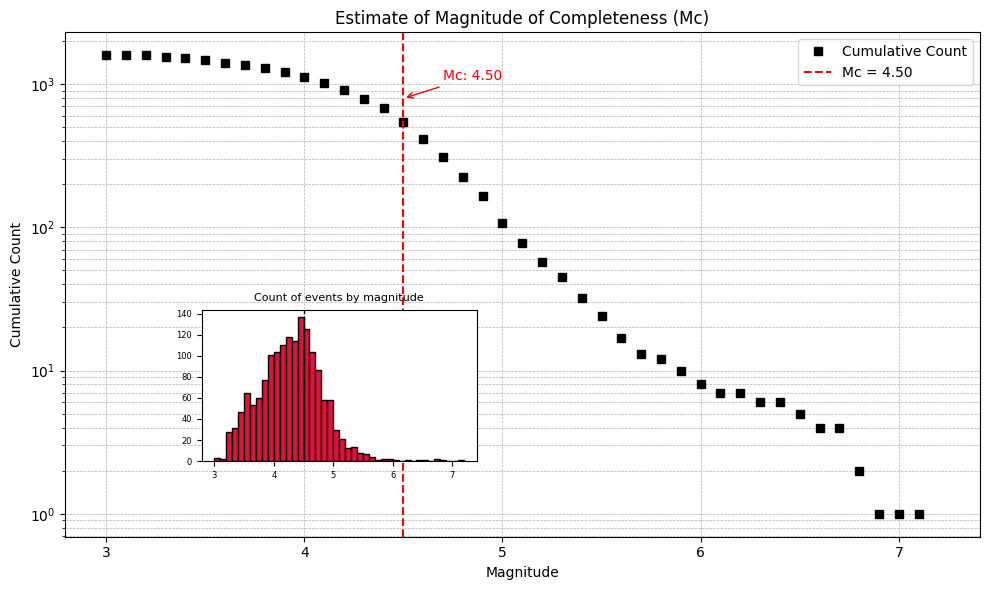

Estimated Magnitude of Completeness (Mc): 4.30


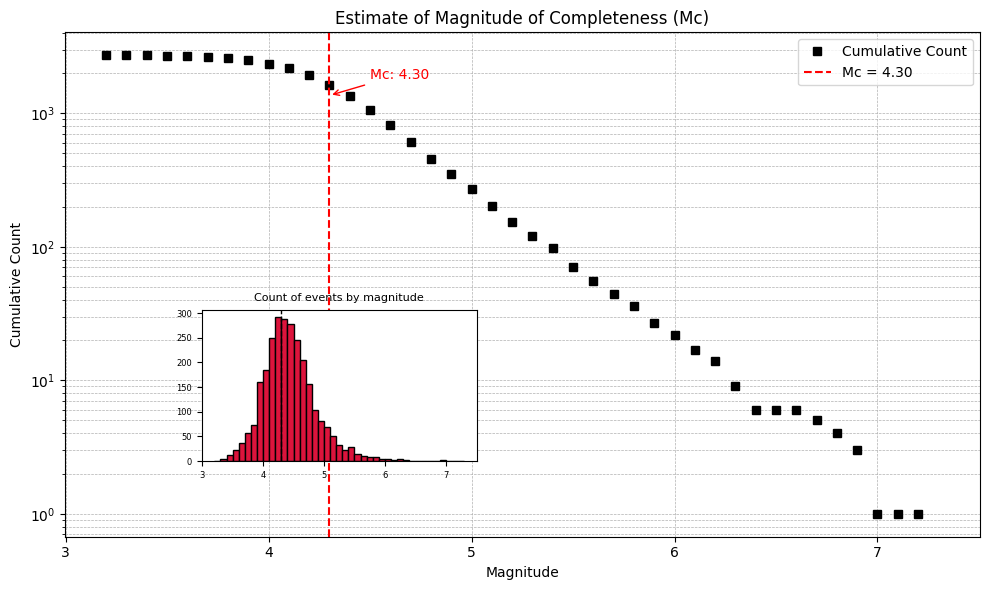

Estimated Magnitude of Completeness (Mc): 4.50


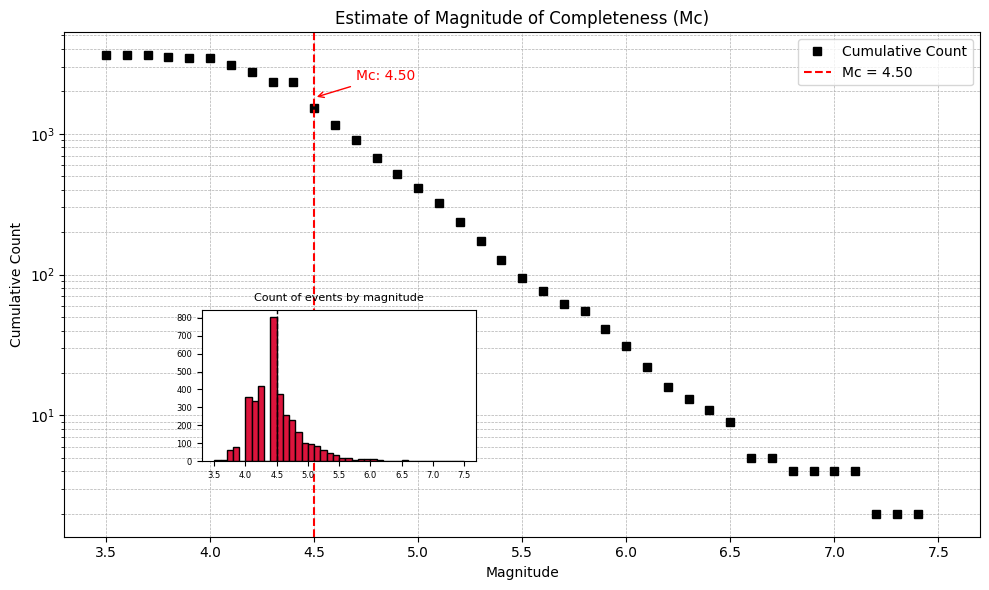

Estimated Magnitude of Completeness (Mc): 4.50


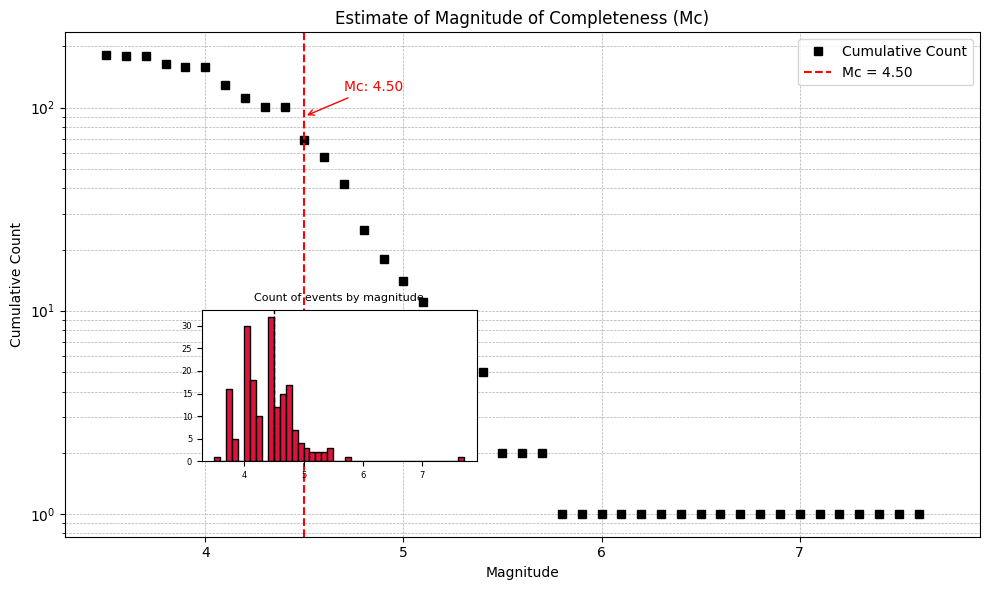

In [11]:
mc1 = estimate_mc(df_z11)
mc2 = estimate_mc(df_z22)
mc3 = estimate_mc(df_z33)
mc4 = estimate_mc(df_z44)

Estimated Magnitude of Completeness (Mc): 4.50


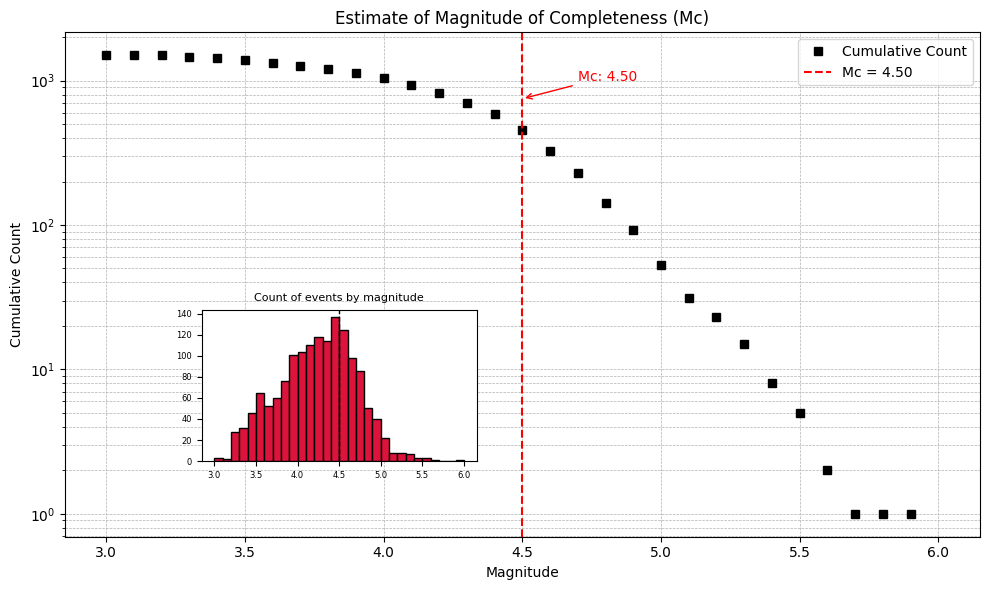

In [68]:
real_mc = estimate_mc(real_df)

In [12]:
def mc_filt(df,mc):
  return df[df['mag'] >= mc]

In [13]:
df_z1 = mc_filt(df_z1,mc1)
df_z2 = mc_filt(df_z2,mc2)
df_z3 = mc_filt(df_z3,mc3)
df_z4 = mc_filt(df_z4,mc4)

In [123]:
real_df = mc_filt(real_df,real_mc)

In [125]:
real_df = df_z1[df_z1["mag"]>=4.30]

In [126]:
real_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1970-02-12T01:51:48.800Z,29.2760,81.6480,15.200,5.40,mw,NaN,NaN,NaN,NaN,...,2022-04-26T21:48:38.680Z,"48 km N of Dailekh, Nepal",earthquake,NaN,3.600,0.420,NaN,reviewed,iscgem,iscgem
1,1970-03-05T18:34:21.100Z,32.3760,76.6080,15.000,5.11,mw,NaN,NaN,NaN,NaN,...,2022-04-26T21:44:46.248Z,"29 km N of P?lampur, India",earthquake,NaN,12.700,0.270,NaN,reviewed,iscgem,iscgem
2,1972-02-20T03:02:12.440Z,34.4790,80.4740,15.000,5.16,mw,NaN,NaN,NaN,NaN,...,2022-04-26T20:56:33.865Z,"268 km E of Leh, India",earthquake,NaN,25.000,0.200,NaN,reviewed,iscgem,iscgem
3,1972-04-21T21:19:28.500Z,35.0200,81.2810,15.000,5.13,mw,NaN,NaN,NaN,NaN,...,2022-04-26T20:52:41.070Z,"261 km SSE of Hotan, China",earthquake,NaN,25.000,0.200,NaN,reviewed,iscgem,iscgem
4,1972-09-06T02:51:29.020Z,32.3980,78.4140,10.000,5.28,mw,NaN,NaN,NaN,NaN,...,2022-04-26T20:41:19.379Z,"114 km NNE of Sar?han, India",earthquake,NaN,8.600,0.230,NaN,reviewed,iscgem,iscgem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,2024-06-03T22:38:26.296Z,33.5275,81.8103,10.000,4.30,mb,48.0,121.0,6.443,0.62,...,2024-08-16T21:59:26.040Z,western Xizang,earthquake,8.90,1.914,0.102,27.0,reviewed,us,us
1587,2024-12-08T18:12:25.381Z,33.5308,81.9295,10.000,4.50,mb,46.0,121.0,6.399,0.71,...,2025-02-15T18:31:05.040Z,western Xizang,earthquake,9.58,1.907,0.086,40.0,reviewed,us,us
1588,2024-12-17T11:23:27.288Z,29.8310,81.3883,20.081,4.40,mb,26.0,159.0,3.968,0.59,...,2025-02-27T17:30:51.040Z,"55 km SSE of Burang, China",earthquake,9.24,3.702,0.126,19.0,reviewed,us,us
1589,2024-12-18T10:53:06.485Z,34.2703,78.7475,10.000,4.40,mb,36.0,106.0,4.595,0.69,...,2025-02-27T17:30:52.040Z,"107 km E of Leh, India",earthquake,10.13,1.906,0.106,26.0,reviewed,us,us


# Performing declustering using Gardner-Knopoff window to only keep the mainshocks and ignore the aftershocks

In [14]:
from geopy.distance import geodesic
import pandas as pd

# Empirical time and distance windows
def get_window(mag):
    if mag >= 6.5:
        t = 10 ** (0.032 * mag + 2.7389)
    else:
        t = 10 ** (0.5409 * mag - 0.547)
    d = 10 ** (0.1238 * mag + 0.983)
    return t, d

def decluster_gardner_knopoff(df):
    df = df.copy()
    df['time'] = pd.to_datetime(df['time'])
    df = df.sort_values('time').reset_index(drop=True)
    df['is_mainshock'] = True

    for i, row in df.iterrows():
        if not df.at[i, 'is_mainshock']:
            continue
        t1, m1 = row['time'], row['mag']
        lat1, lon1 = row['latitude'], row['longitude']
        time_win, dist_win = get_window(m1)

        for j in range(i + 1, len(df)):
            t2 = df.at[j, 'time']
            if (t2 - t1).days > time_win:
                break
            dist = geodesic((lat1, lon1), (df.at[j, 'latitude'], df.at[j, 'longitude'])).km
            if dist <= dist_win:
                df.at[j, 'is_mainshock'] = False
    return df[df['is_mainshock']].copy()


In [15]:
declustered_df_z1 = decluster_gardner_knopoff(df_z1)
print(len(declustered_df_z1))
declustered_df_z2 = decluster_gardner_knopoff(df_z2)
print(len(declustered_df_z2))
declustered_df_z3 = decluster_gardner_knopoff(df_z3)
print(len(declustered_df_z3))
declustered_df_z4 = decluster_gardner_knopoff(df_z4)
print(len(declustered_df_z4))


293
1144
573
21


In [122]:
declustered_df_z1.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,is_mainshock
0,1973-12-16 09:16:14.100000+00:00,32.284,76.028,33.0,4.9,mb,NaN,NaN,NaN,NaN,...,"3 km N of Kotla, India",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,True
1,1974-02-24 21:32:08.800000+00:00,30.943,78.053,45.0,4.7,mb,NaN,NaN,NaN,NaN,...,"20 km NW of Barkot, India",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,True
2,1974-07-02 16:25:53.300000+00:00,35.579,80.908,33.0,4.7,mb,NaN,NaN,NaN,NaN,...,"190 km SSE of Hotan, China",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,True
3,1974-07-07 20:56:49.700000+00:00,30.638,78.692,33.0,4.9,mb,NaN,NaN,NaN,NaN,...,"25 km ESE of Uttark?shi, India",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,True
5,1974-10-30 02:33:36.600000+00:00,35.597,77.543,103.0,4.8,mb,NaN,NaN,NaN,NaN,...,"100 km NE of Thang, India",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,True


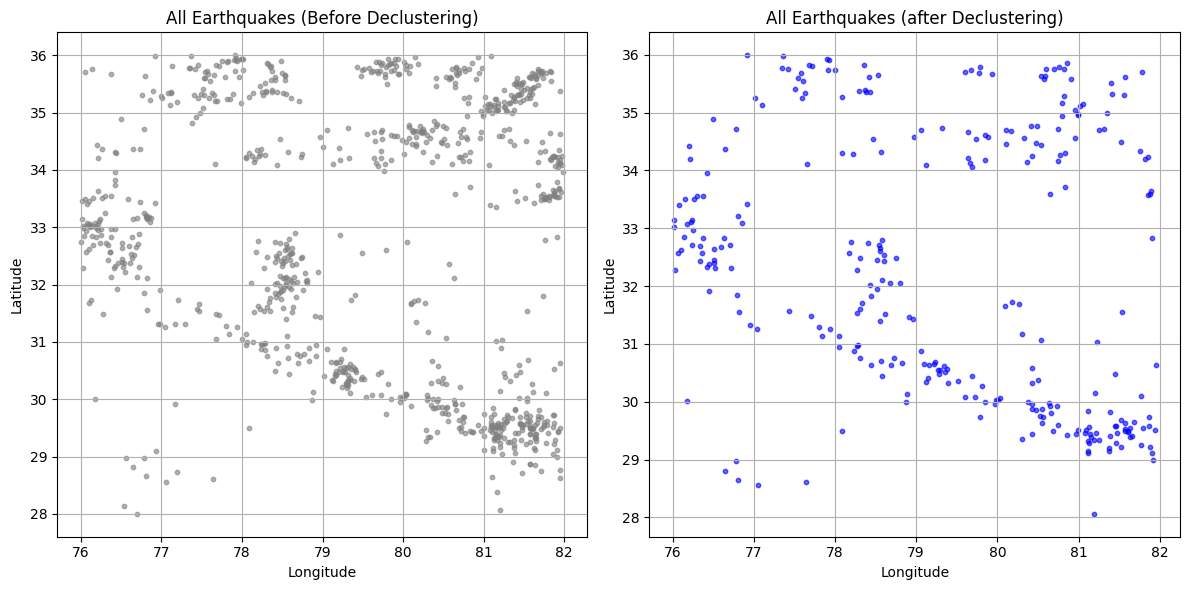

In [157]:
import matplotlib.pyplot as plt

# Plot spatial distribution before and after ETAS declustering
plt.figure(figsize=(12, 6))

# All events (before declustering)
plt.subplot(1, 2, 1)
plt.scatter(real_df["longitude"], real_df["latitude"], s=10, c="gray", alpha=0.6)
plt.title("All Earthquakes (Before Declustering)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Only background events (after declustering)
plt.subplot(1, 2, 2)
plt.scatter(declustered_df_z1["longitude"], declustered_df_z1["latitude"], s=10, c="blue", alpha=0.6)
plt.title("All Earthquakes (after Declustering)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.show()

In [174]:
declustered_df_z1

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,is_mainshock
0,1973-12-16 09:16:14.100000+00:00,32.2840,76.0280,33.000,4.9,mb,NaN,NaN,NaN,NaN,...,"3 km N of Kotla, India",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,True
1,1974-02-24 21:32:08.800000+00:00,30.9430,78.0530,45.000,4.7,mb,NaN,NaN,NaN,NaN,...,"20 km NW of Barkot, India",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,True
2,1974-07-02 16:25:53.300000+00:00,35.5790,80.9080,33.000,4.7,mb,NaN,NaN,NaN,NaN,...,"190 km SSE of Hotan, China",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,True
3,1974-07-07 20:56:49.700000+00:00,30.6380,78.6920,33.000,4.9,mb,NaN,NaN,NaN,NaN,...,"25 km ESE of Uttark?shi, India",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,True
5,1974-10-30 02:33:36.600000+00:00,35.5970,77.5430,103.000,4.8,mb,NaN,NaN,NaN,NaN,...,"100 km NE of Thang, India",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,2023-08-26 11:23:06.308000+00:00,34.4965,81.5254,10.000,4.6,mb,53.0,74.0,6.903,0.88,...,"222 km S of Aqqan, China",earthquake,3.28,1.884,0.080,47.0,reviewed,us,us,True
438,2023-10-03 08:55:50.480000+00:00,29.4590,81.2188,10.000,4.9,mb,83.0,49.0,3.933,0.59,...,"34 km NE of Dipayal, Nepal",earthquake,7.34,1.760,0.059,91.0,reviewed,us,us,True
443,2023-12-25 23:03:56.507000+00:00,34.7111,76.7782,34.705,4.6,mb,100.0,79.0,3.096,0.40,...,"24 km S of Thang, India",earthquake,5.88,5.172,0.059,85.0,reviewed,us,us,True
444,2024-04-12 05:04:55.702000+00:00,33.5976,81.8770,10.000,4.7,mb,81.0,87.0,6.478,0.80,...,western Xizang,earthquake,7.34,1.772,0.069,63.0,reviewed,us,us,True


In [129]:
df_gk_declust = declustered_df_z1

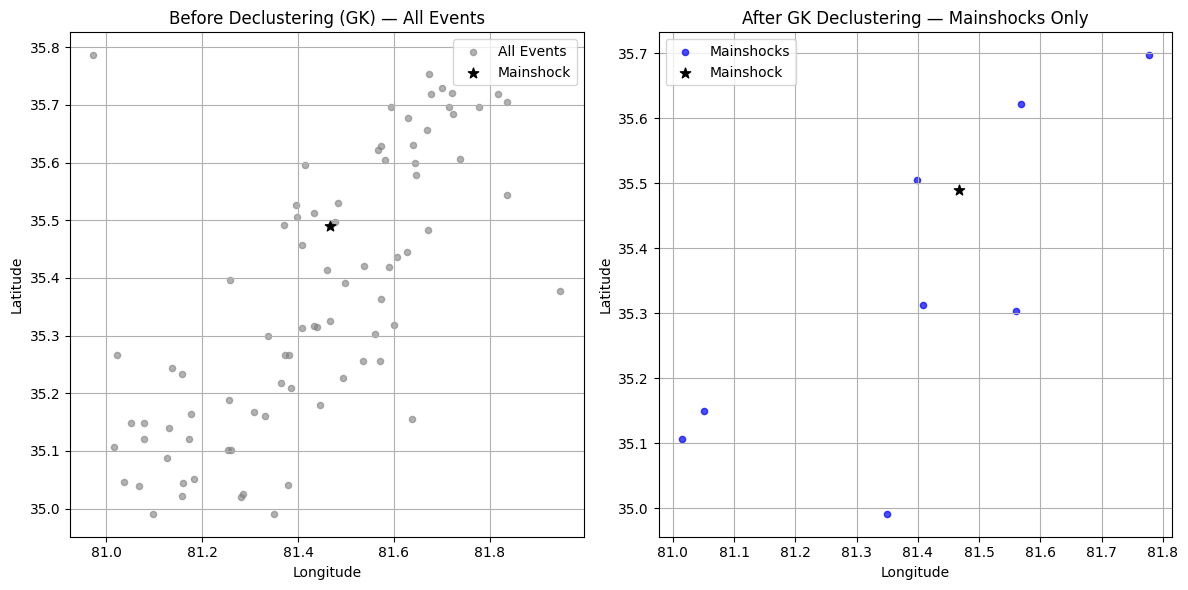

In [175]:
import matplotlib.pyplot as plt

# --- 1. Find the highest magnitude earthquake from original dataset ---
max_mag_event = real_df.loc[real_df["mag"].idxmax()]
lon_center = max_mag_event["longitude"]
lat_center = max_mag_event["latitude"]
delta = 0.5  # degrees window around the mainshock

# --- 2. Filter both datasets around this region ---
# (a) Original (includes all events)
df_orig_nearby = real_df[
    (real_df["longitude"] >= lon_center - delta) & (real_df["longitude"] <= lon_center + delta) &
    (real_df["latitude"] >= lat_center - delta) & (real_df["latitude"] <= lat_center + delta)
]

# (b) GK-declustered (only mainshocks)
df_gk_nearby = df_gk_declust[
    (df_gk_declust["longitude"] >= lon_center - delta) & (df_gk_declust["longitude"] <= lon_center + delta) &
    (df_gk_declust["latitude"] >= lat_center - delta) & (df_gk_declust["latitude"] <= lat_center + delta)
]

# --- 3. Plot the spatial window before and after declustering ---
plt.figure(figsize=(12, 6))

# Before declustering (original catalog)
plt.subplot(1, 2, 1)
plt.scatter(df_orig_nearby["longitude"], df_orig_nearby["latitude"], s=20, c="gray", alpha=0.6, label="All Events")
plt.scatter([lon_center], [lat_center], s=60, c="black", marker="*", label="Mainshock")
plt.title("Before Declustering (GK) — All Events")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)

# After declustering (mainshocks only)
plt.subplot(1, 2, 2)
plt.scatter(df_gk_nearby["longitude"], df_gk_nearby["latitude"], s=20, c="blue", alpha=0.7, label="Mainshocks")
plt.scatter([lon_center], [lat_center], s=60, c="black", marker="*", label="Mainshock")
plt.title("After GK Declustering — Mainshocks Only")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [139]:
df_z1.to_csv("GK_declustered_df")

# **Computing a-value and b-value**
## a-value : reflects the overall level of seismic activity in a region.
## b-value : reflects how fast the frequency of earthquakes depletes as the magnitude increases

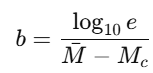

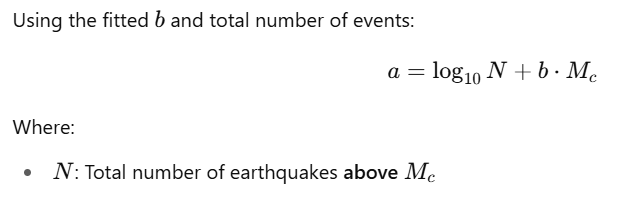

In [16]:
def compute_ab(data, Mc):
    data = data[data['mag'] >= Mc]
    N = len(data)
    M_mean = data['mag'].mean()
    b = 0.4343 / (M_mean - Mc)
    a = np.log10(N) + b * Mc
    return a, b, data

In [133]:
a1, b1, df_z1 = compute_ab(declustered_df_z1, 4.50)
a2, b2, df_z2 = compute_ab(declustered_df_z2, mc2)
a3, b3, df_z3 = compute_ab(declustered_df_z3, mc3)
a4, b4, df_z4 = compute_ab(declustered_df_z4, mc4)

In [134]:

zone_comparison = pd.DataFrame({
    'Zone': ['Z1 - Himalaya', 'Z2 - NE India', 'Z3 - Andaman', 'Z4 - Kutch'],
    'a-value': [a1, a2, a3, a4],
    'b-value': [b1, b2, b3, b4]
})


zone_comparison = zone_comparison.round(3)

# Display
from IPython.display import display
display(zone_comparison)


,Zone,a-value,b-value
0,Z1 - Himalaya,9.196,1.495
1,Z2 - NE India,8.323,1.224
2,Z3 - Andaman,8.966,1.379
3,Z4 - Kutch,6.944,1.249


In [19]:


def plot_gr_curves_four_zones(data_list, mc_list, a_list, b_list, labels):
    """
    Plots Gutenberg–Richter curves for four zones.

    Parameters:
    - data_list: list of 4 DataFrames (each zone's data)
    - mc_list: list of Mc values
    - a_list: list of a-values
    - b_list: list of b-values
    - labels: list of zone labels (e.g., ['Z1 - Himalaya', 'Z2 - NE', ...])
    """
    plt.figure(figsize=(12, 7))
    bin_width = 0.1

    markers = ['o', 's', '^', 'D']  # Different markers for each zone
    colors = ['r', 'g', 'b', 'orange']  # Different line colors

    for i in range(4):
        data = data_list[i]
        Mc = mc_list[i]
        a = a_list[i]
        b = b_list[i]
        label = labels[i]

        # Binning and counts
        bins = np.arange(data['mag'].min(), data['mag'].max() + bin_width, bin_width)
        counts = [np.sum(data['mag'] >= m) for m in bins]
        log_counts = np.log10(counts)
        GR_fit = a - b * bins

        # Plot observed and fitted
        plt.plot(bins, log_counts, markers[i], label=f'{label}: Data')
        plt.plot(bins, GR_fit, '-', color=colors[i], label=f'{label}: Fit (b={b:.2f})')

    plt.xlabel('Magnitude')
    plt.ylabel('log10(N ≥ M)')
    plt.title('Gutenberg–Richter Frequency–Magnitude Curves (Zones Z1–Z4)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


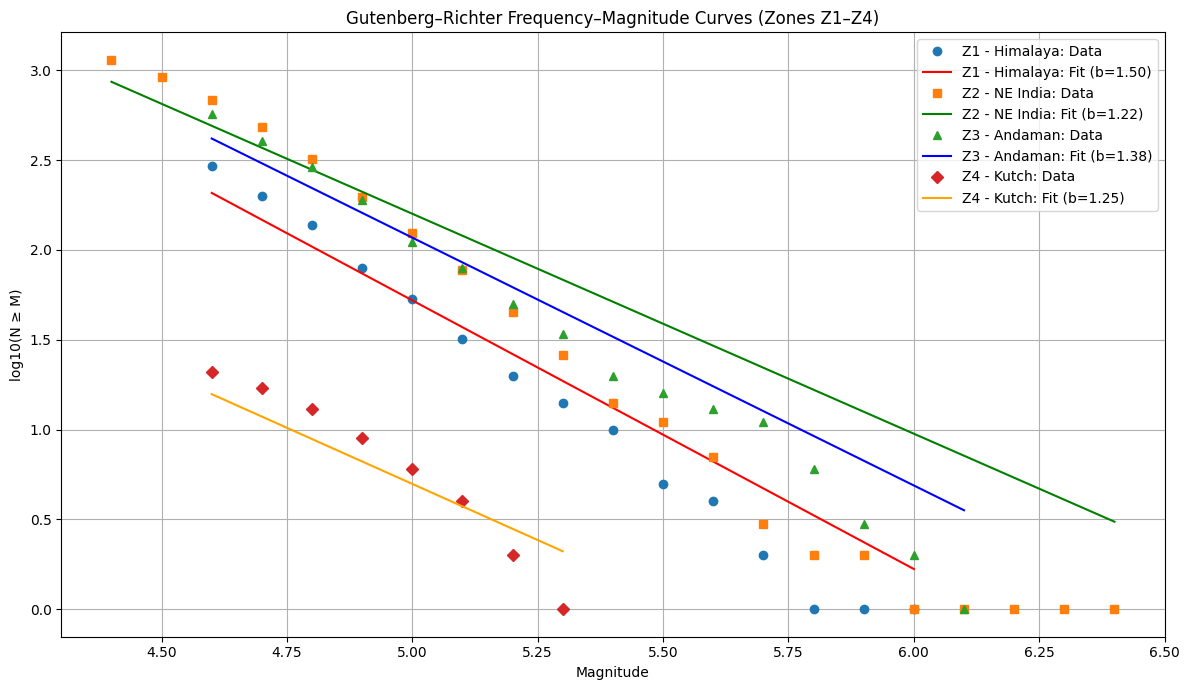

In [20]:
# Prepare inputs
data_list = [df_z1, df_z2, df_z3, df_z4]
mc_list = [mc1, mc2, mc3, mc4]
a_list = [a1, a2, a3, a4]
b_list = [b1, b2, b3, b4]
labels = ['Z1 - Himalaya', 'Z2 - NE India', 'Z3 - Andaman', 'Z4 - Kutch']

# Plot
plot_gr_curves_four_zones(data_list, mc_list, a_list, b_list, labels)


In [21]:


def plot_gr_curves(data, mc, a, b, label):
    """
    Plots Gutenberg–Richter curves for four zones.

    Parameters:
    - data_list: list of 4 DataFrames (each zone's data)
    - mc_list: list of Mc values
    - a_list: list of a-values
    - b_list: list of b-values
    - labels: list of zone labels (e.g., ['Z1 - Himalaya', 'Z2 - NE', ...])
    """
    plt.figure(figsize=(12, 7))
    bin_width = 0.1

    marker = 'o'
    colors = 'r'



     # Binning and counts
    bins = np.arange(data['mag'].min(), data['mag'].max() + bin_width, bin_width)
    counts = [np.sum(data['mag'] >= m) for m in bins]
    log_counts = np.log10(counts)
    GR_fit = a - b * bins

     # Plot observed and fitted
    plt.plot(bins, log_counts, marker, label=f'{label}: Data')
    plt.plot(bins, GR_fit, '-', color=colors, label=f'{label}: Fit (b={b:.2f})')

    plt.xlabel('Magnitude')
    plt.ylabel('log10(N ≥ M)')
    plt.title('Gutenberg–Richter Frequency–Magnitude Curves (Zones Z1–Z4)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


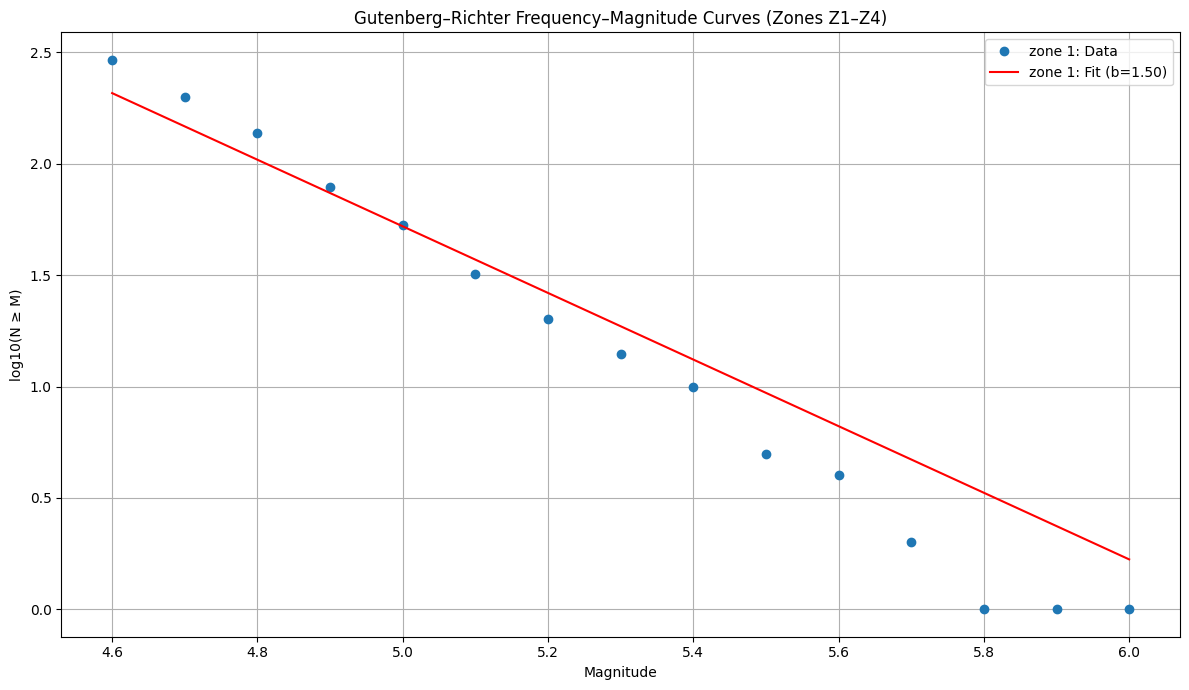

In [22]:
plot_gr_curves(df_z1,mc1,a1,b1,"zone 1")

# **STOCHASTICAL EVENT SET GENERATION**

## Starting with an example of *Inversion method* for generating samples from an exponential distribution, following is the probability density function of the distribution

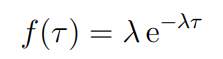

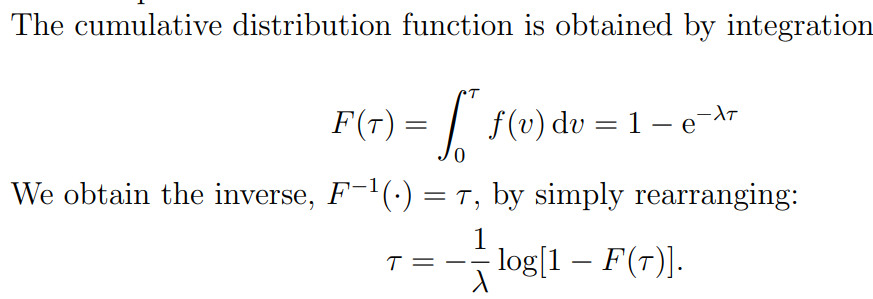

## Now we set F(t) as U and choose any value from (0,1) uniformly and generate the corresponding sample

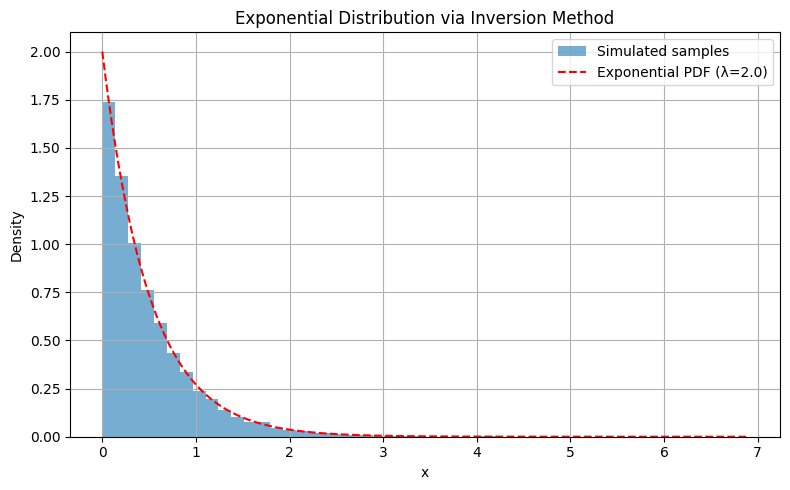

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_rate = 2.0  # you can change this
n_samples = 10000  # number of samples to generate

# Inversion method: U ~ Uniform(0,1)
U = np.random.uniform(0, 1, n_samples)
X = -np.log(U) / lambda_rate  # Inverse CDF transformation

# Plot the histogram of generated samples
plt.figure(figsize=(8, 5))
plt.hist(X, bins=50, density=True, alpha=0.6, label='Simulated samples')

# Overlay the true exponential PDF
x_vals = np.linspace(0, X.max(), 200)
pdf = lambda_rate * np.exp(-lambda_rate * x_vals)
plt.plot(x_vals, pdf, 'r--', label=f'Exponential PDF (λ={lambda_rate})')

plt.title('Exponential Distribution via Inversion Method')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# We build on this fundamental idea of data simulation and use it for applying the ETAS model.

# **ETAS MODEL** : Epidemic Type Aftershock Sequence

## The ETAS model is a stochastic point process model used to simulate or forecast the spatio-temporal clustering of earthquakes, particularly aftershocks. It's based on the idea that each earthquake can generate its own aftershocks, which can, in turn, trigger more — forming a cascade (epidemic) of events.

## **Purpose of this method** : explains how to simulate the **magnitude** ( via GR kernel) , **position** ( via spatial kernel) and **time** ( via temporal kernel) of the next event in a point process where the event rate ( Intensity) IS NOT CONSTANT and may change over time.

## In a Poisson process the time between the events follows an exponential distribution with a constant rate lambda **BUT** in real world systems like earthquake magnitudes, positions, etc,  the rate changes over time

## To capture this inhomogeneous process , we define the **Conditional Intensity function**

### the function gives the instantaneous rate of the occurence of an earthquake at time t, location (x,y) and magnitude m, given the history of all the previous events

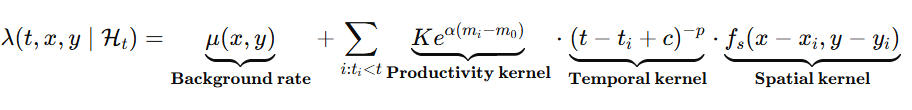

## **Background rate**

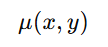

## Represents the rate of background (spontaneous) or mainshock earthquakes at location (x,y).


## **Productivity Kernel**

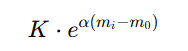

## Controls how many aftershocks are generated by an earthquake of magnitude mi, where K (base productivity) and alpha (sensitivity to magnitude) are parameters defined using Maximum Likelihood Estimaation.


## **Temporal Kernel** (Omori's Law)

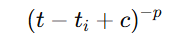

## Describes how the influence of a past event decays over time.

## **Spatial Kernel**

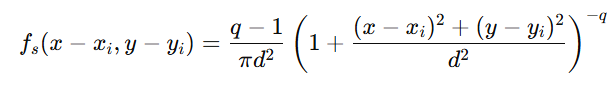

## Models how aftershock density decays with distance from the mainshock epicenter. where d is the spatial scale parameter and q is the spatial decay exponent

In [70]:
df = real_df

# FlOWCHART OF OUR ETAS MODEL

In [71]:
def estimate_b_value(magnitudes, mc):
    mags = np.array(magnitudes)
    mags = mags[mags >= mc]
    b = (np.log10(np.e)) / (np.mean(mags) - mc)
    return b

b_val = estimate_b_value(df['mag'], mc1)
beta_fixed = b_val * np.log(10)
print(f"Estimated b-value: {b_val:.3f}, Fixed β (beta): {beta_fixed:.3f}")

Estimated b-value: 1.418, Fixed β (beta): 3.266


## Estimating the model parameters using MLE

## ETAS PARAMETERS:


### K  = Productivity constant (number of aftershocks)
### alpha = Magnitude scaling of productivity
### c = Time offset in Omori decay (prevents singularity)
### p = Controls temporal decay rate (Omori law)\
### d = Spatial scale of triggering
### q = Spatial decay exponent
### β = Magnitude distribution parameter (usually fixed, from GR law: β = b·ln(10))

In [76]:
df["time"] = pd.to_datetime(df["time"])


In [77]:
start_time = df["time"].min()
df["time"] = (df["time"] - start_time).dt.total_seconds() / (3600 * 24)  # Convert to days


## The goal is to Find the parameter vector θ=(μ,K,α,c,p,d,q) that maximizes the log-likelihood of observing the original earthquake catalog.

## we define the log-likelihood function 

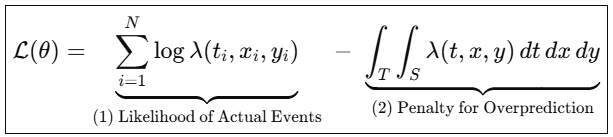

In [ ]:
import numpy as np

def full_etas_log_likelihood(params, df, mc, spatial_bounds, temporal_bounds, beta):
    K, alpha, c, p, d, q = params
    m0 = mc
    N = len(df)

    
    t = df['time'].values
    x = df['longitude'].values
    y = df['latitude'].values
    m = df['mag'].values

    logL = 0.0
    for i in range(N):
        lambda_i = 0.0
        for j in range(i):
            dt = t[i] - t[j]
            if dt <= 0:
                continue

            r2 = (x[i] - x[j])**2 + (y[i] - y[j])**2
            spatial = (q - 1) / (np.pi * d**2) * (1 + r2 / d**2)**(-q)
            temporal = (dt + c)**(-p)
            productivity = K * np.exp(alpha * (m[j] - m0))

            lambda_i += productivity * temporal * spatial

        lambda_i = max(lambda_i, 1e-10)  # Avoid log(0)
        logL += np.log(lambda_i)

    # Integral (expected number of events)
    T = temporal_bounds[1] - temporal_bounds[0]
    A = (spatial_bounds[1] - spatial_bounds[0]) * (spatial_bounds[3] - spatial_bounds[2])

    integral = 0.0
    for j in range(N):
        productivity = K * np.exp(alpha * (m[j] - m0))

        # Omori temporal integral
        if p == 1:
            temporal_integral = np.log((T + c) / c)
        else:
            temporal_integral = ((T + c)**(1 - p) - c**(1 - p)) / (1 - p)

        # Spatial kernel integral
        if q > 2:
            spatial_integral = np.pi * d**2 / (q - 2)
        else:
            spatial_integral = A  # fallback: integrate over full spatial region

        integral += productivity * temporal_integral * spatial_integral

    total_loglik = logL - integral

    # Numerical safety
    if np.isnan(total_loglik) or np.isinf(total_loglik):
        return np.inf

    return -total_loglik  # minimize this


## minimize to get the estimated parameters

In [104]:
from scipy.optimize import minimize

# Fixed beta, now we estimate only [K, alpha, c, p, d, q]
init_params = [0.1, 1.0, 0.01, 1.1, 10.0, 1.5]
bounds = [
    (1e-5, 10),   # K
    (0.1, 5),     # alpha
    (1e-4, 1),    # c
    (1.01, 3),    # p
    (1.0, 50),    # d
    (1.01, 5)     # q
]

x = df['longitude'].values
y = df['latitude'].values
spatial_bounds = [min(x), max(x), min(y), max(y)]
temporal_bounds = [0, 365 * 10]  # 10 years

# Run MLE
result = minimize(full_etas_log_likelihood, init_params,
                  args=(df, real_mc, spatial_bounds, temporal_bounds, beta_fixed),
                  bounds=bounds, method='Powell',options={'maxiter': 1000, 'disp': True}
)

etas_params = result.x
print("Estimated ETAS Parameters (K, α, c, p, d, q):", etas_params)


Optimization terminated successfully.
         Current function value: 3177.381490
         Iterations: 12
         Function evaluations: 1409
Estimated ETAS Parameters (K, α, c, p, d, q): [0.0532948  1.73574377 0.19290043 1.01004802 1.00003146 4.99994197]


In [84]:
print(result.success)
print(result.message)

True
Optimization terminated successfully.


In [140]:
etas_params[0] = 0.0532948  

In [113]:
mc=mc1

In [114]:
# Extract fitted parameters
K, alpha, c, p, d, q = etas_params
beta = beta_fixed
m0 = mc
T = 365 * 10  # Simulation window (days)
area_bounds = spatial_bounds

## Calculating the Poisson rate u

# u = N_mainshocks/ (Area x Time)

In [116]:
# Bounds
area = (spatial_bounds[1] - spatial_bounds[0]) * (spatial_bounds[3] - spatial_bounds[2])
T_days = df["time"].max() - df["time"].min()
N_mainshocks = len(df)

# Background rate
mu = N_mainshocks / (area * T_days)

print(f"Estimated background rate μ = {mu:.6f} events/day/deg²")


Estimated background rate μ = 0.000970 events/day/deg²


# ETAS SIMULATION

In [164]:
import numpy as np
import pandas as pd


m0 = mc


# Bounds and time
spatial_bounds = (75, 80, 30, 35)
T = 365 * 55
max_events = 1_000_000
start_time = pd.Timestamp("1970-01-01")
area = (spatial_bounds[1] - spatial_bounds[0]) * (spatial_bounds[3] - spatial_bounds[2])
expected_background = int(mu * T * area)

# Helper functions
def sample_magnitudes(n, beta, m0):
    u = np.random.uniform(0, 1, n)
    return m0 - (1 / beta) * np.log(1 - u)

def sample_omori_times(n, c, p):
    u = np.random.uniform(0, 1, n)
    return c * (np.power(u, -1 / (p - 1)) - 1)

def sample_spatial_offsets(n, d, q):
    u = np.random.uniform(0, 1, n)
    r = d * np.sqrt(np.power(u, -1 / (q - 1)) - 1)
    theta = np.random.uniform(0, 2 * np.pi, n)
    return r * np.cos(theta), r * np.sin(theta)

# Recursive simulation
def simulate_aftershocks(parent_event, max_time, all_events, parent_id, depth=0, max_depth=10):
    if depth > max_depth or len(all_events) >= max_events:
        return []

    t0, x0, y0, m0_val = parent_event
    expected = K * np.exp(alpha * (m0_val - m0))
    n = np.random.poisson(expected)

    if n == 0:
        return []

    times = sample_omori_times(n, c, p) + t0
    mags = sample_magnitudes(n, beta, m0)
    dx, dy = sample_spatial_offsets(n, d, q)
    xs = x0 + dx
    ys = y0 + dy

    new_events = []
    for ti, xi, yi, mi in zip(times, xs, ys, mags):
        if ti > max_time or len(all_events) + len(new_events) >= max_events:
            break
        eid = len(all_events) + len(new_events)
        new_event = (eid, ti, xi, yi, mi, parent_id)
        new_events.append(new_event)

        children = simulate_aftershocks((ti, xi, yi, mi), max_time, all_events + new_events, eid, depth + 1, max_depth)
        new_events.extend(children)

        if len(all_events) + len(new_events) >= max_events:
            break

    return new_events

# STEP 1: Simulate Background Events
n_background = np.random.poisson(expected_background)
times = np.random.uniform(0, T, n_background)
longitudes = np.random.uniform(spatial_bounds[0], spatial_bounds[1], n_background)
latitudes = np.random.uniform(spatial_bounds[2], spatial_bounds[3], n_background)
magnitudes = sample_magnitudes(n_background, beta, m0)

events = [(i, times[i], longitudes[i], latitudes[i], magnitudes[i], -1) for i in range(n_background)]

# STEP 2: Recursively Simulate Aftershocks
all_events = events.copy()
for event in events:
    if len(all_events) >= max_events:
        break
    aftershocks = simulate_aftershocks((event[1], event[2], event[3], event[4]), T, all_events, event[0])
    all_events.extend(aftershocks)
    if len(all_events) % 10000 < 100:
        print(f"{len(all_events)} events simulated so far...")

# STEP 3: Convert to DataFrame
simulated_df = pd.DataFrame(all_events, columns=["id", "time", "longitude", "latitude", "magnitude", "parent_id"])
# simulated_df["time"] = pd.to_timedelta(simulated_df["time"], unit="D") + start_time

# Output shape
print(f"\n Final simulated catalog has {len(simulated_df)} events.")


 Final simulated catalog has 494 events.


C:\Users\aayan\AppData\Local\Temp\ipykernel_37676\221221780.py:23: RuntimeWarning:

overflow encountered in power



In [173]:
simulated_df

,id,time,longitude,latitude,magnitude,parent_id
0,0,13042.132793,75.231170,30.851394,4.527781,-1
1,1,3288.049608,76.973081,33.695932,4.526427,-1
2,2,18234.778564,79.707400,31.122941,4.857454,-1
3,3,7148.842176,75.450109,34.149343,4.549525,-1
4,4,19657.387498,77.058508,31.774615,4.641553,-1
...,...,...,...,...,...,...
489,489,371.719866,75.757448,32.079208,4.553068,393
490,490,19177.426987,77.137412,33.670920,5.478332,411
491,491,14245.814770,78.090028,33.702140,4.936625,430
492,492,3658.207476,77.419047,34.293153,4.993181,444


In [ ]:
s

In [165]:
len(simulated_df)

494

In [166]:
len(simulated_df[simulated_df["parent_id"]!=-1])

43

In [95]:
simulated_df.to_csv('etas_simulated.csv', index=False)

In [145]:
def compute_sim_ab(data, Mc):
    data = data[data['magnitude'] >= Mc]
    N = len(data)
    M_mean = data['magnitude'].mean()
    b = 0.4343 / (M_mean - Mc)
    a = np.log10(N) + b * Mc
    return a, b, data

In [146]:
sim_mc = 4.5
sim_a, sim_b, simulated_df = compute_sim_ab(simulated_df, sim_mc)

In [147]:
print(f"a value:{sim_a} and b value:{sim_b}")

a value:11.066674242077072 and b value:1.4141596420606382


In [148]:
simulated_df = simulated_df.rename(columns={"magnitude": "mag"})


C:\Users\aayan\AppData\Local\Temp\ipykernel_37676\3391059483.py:23: RuntimeWarning:

divide by zero encountered in log10



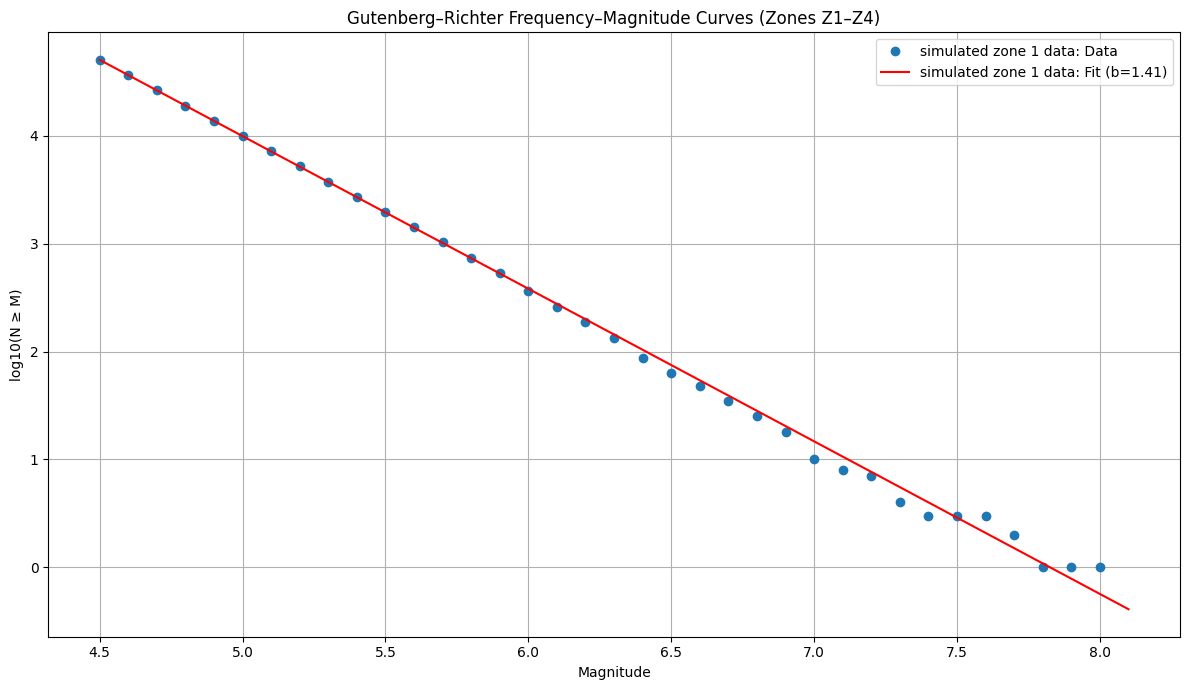

In [149]:
plot_gr_curves(simulated_df,sim_mc,sim_a,sim_b,"simulated zone 1 data")

In [45]:
pip install geopandas


   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
    --------------------------------------- 0.3/19.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.2 MB 1.3 MB/s eta 0:00:15
   - -------------------------------------- 0.8/19.2 MB 1.1 MB/s eta 0:00:17
   -- ------------------------------------- 1.0/19.2 MB 1.1 MB/s eta 0:00:16
   --- ------------------------------------ 1.6/19.2 MB 1.4 MB/s eta 0:00:13
   ---- ----------------------------------- 2.1/19.2 MB 1.7 MB/s eta 0:00:11
   ---- ----------------------------------- 2.1/19.2 MB 1.7 MB/s eta 0:00:11
   ---- ----------------------------------- 2.4/19.2 MB 1.4 MB/s eta 0:00:13
   ------ --------------------------------- 3.1/19.2 MB 1.6 MB/s eta 0:00:11
   -------- ------------------------------- 3.9/19.2 MB 1.8 MB/s eta 0:00:09
   --------- ------------------------------ 4.5/19.2 MB 1.9 MB/s eta 0:00:08
   ---------- ----------------------------- 5.2/19.2 MB 2.1 MB/s eta 0:00:07
   ---------

In [48]:
pip install geodatasets


Note: you may need to restart the kernel to use updated packages.


In [167]:
simulated_df

,id,time,longitude,latitude,magnitude,parent_id
0,0,13042.132793,75.231170,30.851394,4.527781,-1
1,1,3288.049608,76.973081,33.695932,4.526427,-1
2,2,18234.778564,79.707400,31.122941,4.857454,-1
3,3,7148.842176,75.450109,34.149343,4.549525,-1
4,4,19657.387498,77.058508,31.774615,4.641553,-1
...,...,...,...,...,...,...
489,489,371.719866,75.757448,32.079208,4.553068,393
490,490,19177.426987,77.137412,33.670920,5.478332,411
491,491,14245.814770,78.090028,33.702140,4.936625,430
492,492,3658.207476,77.419047,34.293153,4.993181,444


In [50]:
df = simulated_df

In [59]:
from sklearn.neighbors import NearestNeighbors

def mean_nn_dist(df):
    coords = df[['latitude', 'longitude']].to_numpy()
    nn = NearestNeighbors(n_neighbors=2).fit(coords)
    distances, _ = nn.kneighbors(coords)
    return distances[:, 1].mean()

print("Mean NN Distance (Real):", mean_nn_dist(real_df))
print("Mean NN Distance (Sim):", mean_nn_dist(simulated_df))


Mean NN Distance (Real): 0.06204808503714136
Mean NN Distance (Sim): 18.749261366833657


In [58]:
real_df = pd.read_csv("D:\Sem-2\OASIS LMF PROJECT\Z1_Himalaya.csv")

<>:1: SyntaxWarning:

invalid escape sequence '\S'

<>:1: SyntaxWarning:

invalid escape sequence '\S'

C:\Users\aayan\AppData\Local\Temp\ipykernel_37676\110260296.py:1: SyntaxWarning:

invalid escape sequence '\S'



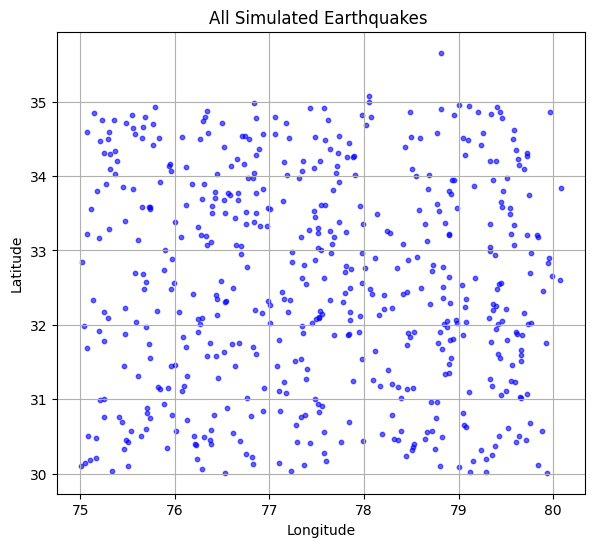

In [160]:
import matplotlib.pyplot as plt

# Plot spatial distribution before and after ETAS declustering
plt.figure(figsize=(15, 6))

# All events (before declustering)
plt.subplot(1, 2, 1)
plt.scatter(simulated_df["longitude"], simulated_df["latitude"], s=10, c="blue", alpha=0.6)
plt.title("All Simulated Earthquakes ")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

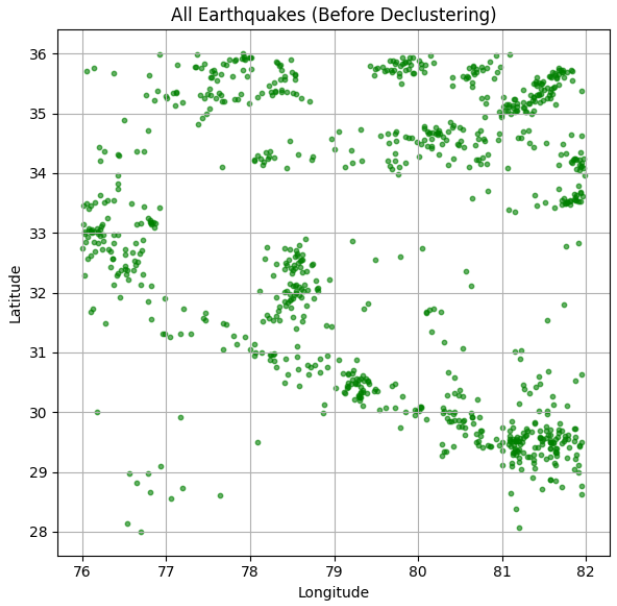

In [172]:
pip install contextility

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement contextility (from versions: none)
ERROR: No matching distribution found for contextility


# How we can improve 

## The model assumes that each earthquake triggers aftershocks equally in all directions (i.e., radially symmetric).It uses an isotropic kernel that only depends on the distance r from the epicenter.

## Need of an anisotropic kernel

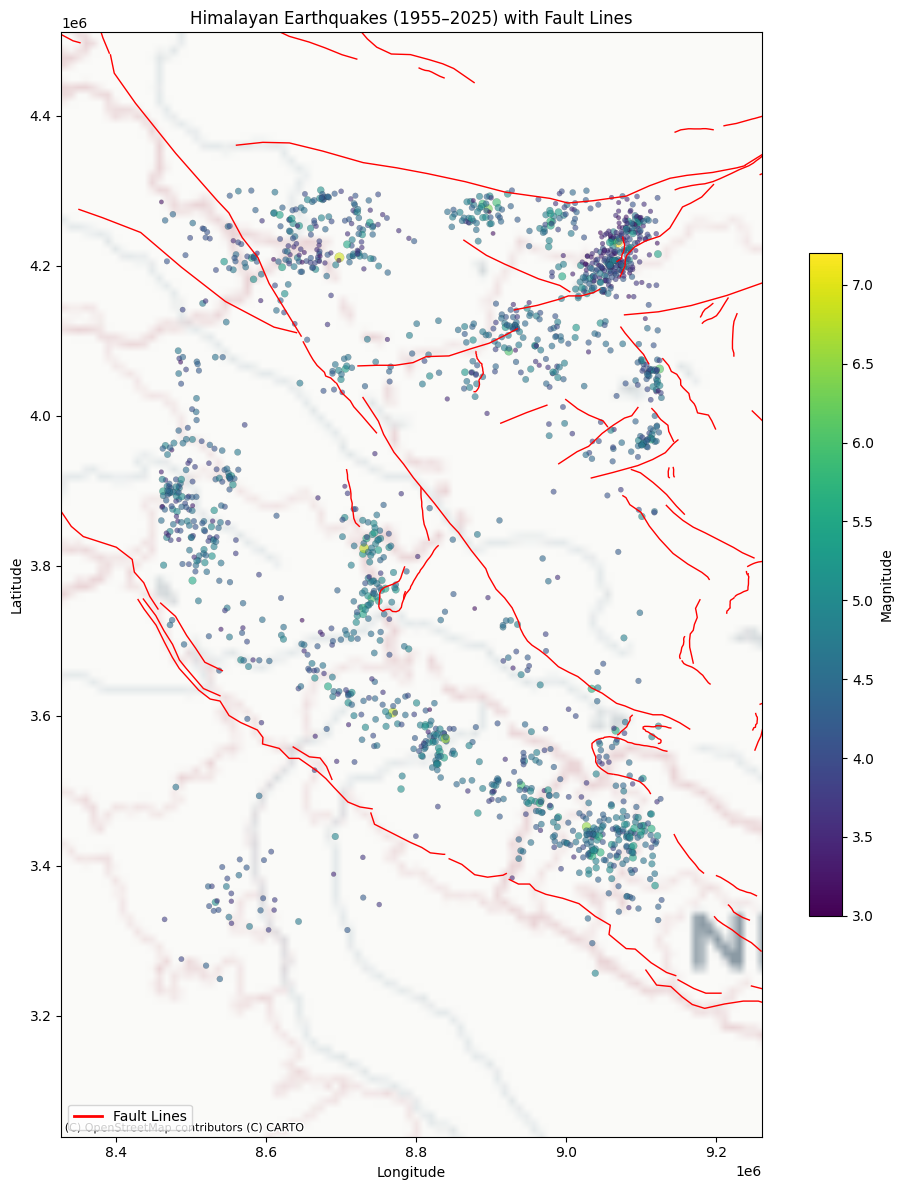

## aftershocks tend to cluster along faults — which are directional (anisotropic).

## Use an anisotropic spatial kernel that aligns aftershock density with the rupture orientation.

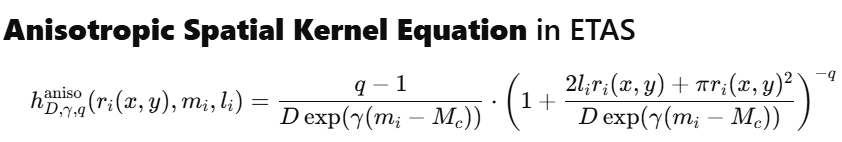

## where Li is the estimated rupture length of event i , based on the magnitude mi 
​